**Customer Segmentation using Clustering¶


In [60]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns



Data
The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [61]:
df = pd.read_csv('../input/Mall_Customers.csv')

In [62]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
df.shape

(200, 5)

In [64]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [65]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [66]:
# checking if there is any NULL data
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Count')

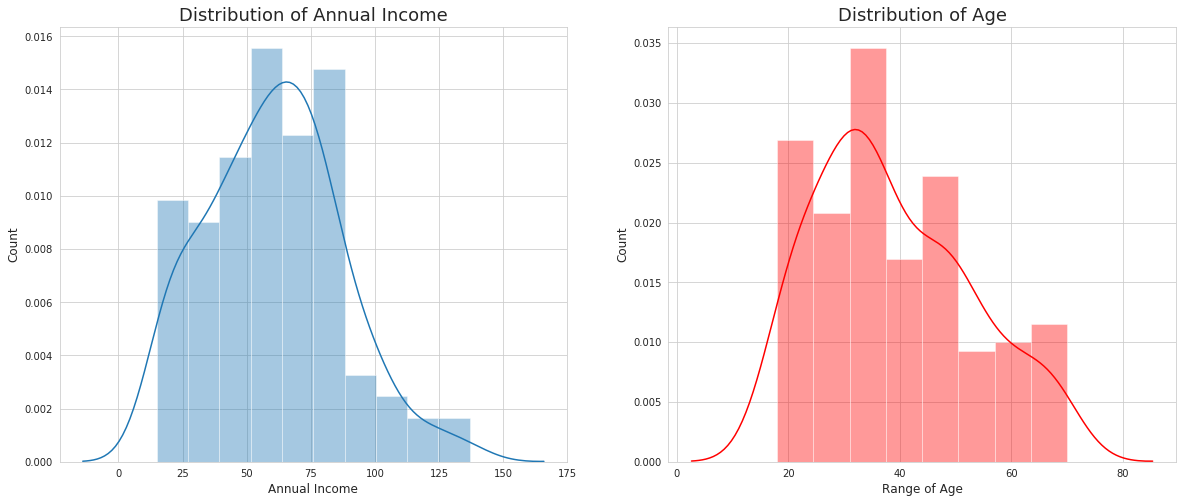

In [67]:
#data visualization
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
sns.distplot(df['Annual Income (k$)'])
sns.set_style('whitegrid')
plt.title('Distribution of Annual Income', fontsize=18)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(1,2,2)
sns.distplot(df['Age'], color='r')
sns.set_style('whitegrid')
plt.title('Distribution of Age', fontsize=18)
plt.xlabel('Range of Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [68]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

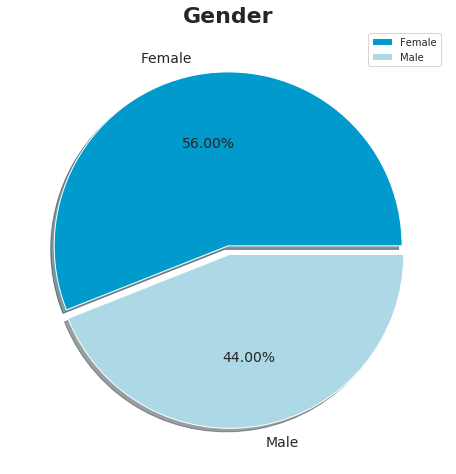

In [69]:
plt.figure(figsize=(8,8))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22    
        }

labels = ['Female', 'Male']
values = df['Gender'].value_counts()
colors = ['#009ACD', '#ADD8E6']
explode = [0, 0.05]

plt.pie(values, labels=labels, explode=explode,colors=colors, shadow=True, autopct= '%.2f%%', textprops={'fontsize':14})
plt.title('Gender', fontdict=font)
plt.legend()

Text(0.5, 1.0, 'Distribution of Age')

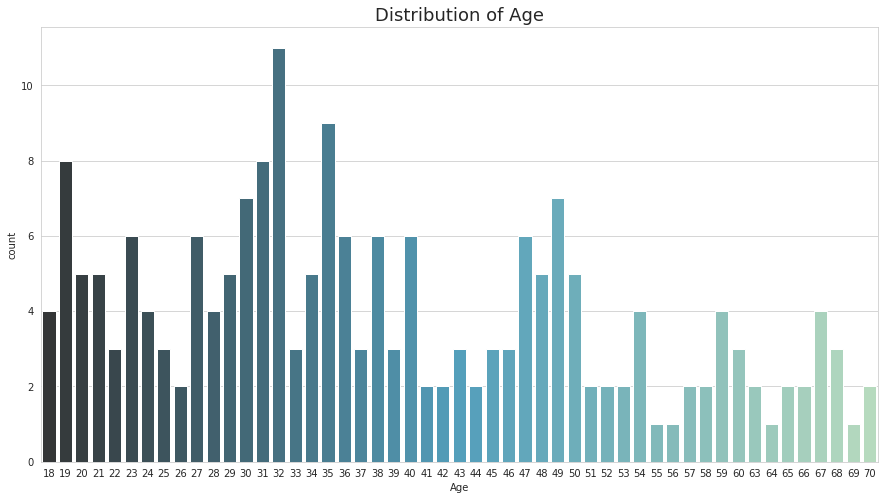

In [70]:
plt.figure(figsize=(15,8))
sns.countplot(df['Age'], palette='GnBu_d')
plt.title('Distribution of Age', fontsize = 18)

Text(0.5, 1.0, 'Distribution of Annual Income')

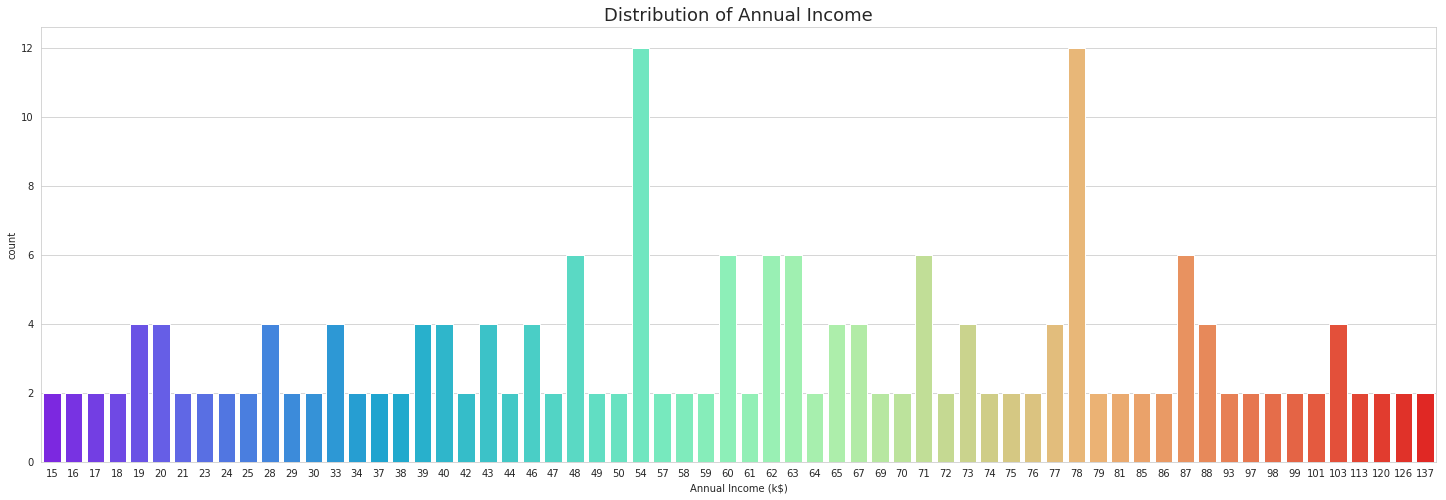

In [71]:
plt.figure(figsize=(25,8))
sns.countplot(df['Annual Income (k$)'], palette='rainbow')
plt.title('Distribution of Annual Income', fontsize = 18)

Text(0.5, 1.0, 'Distribution of Spending Score')

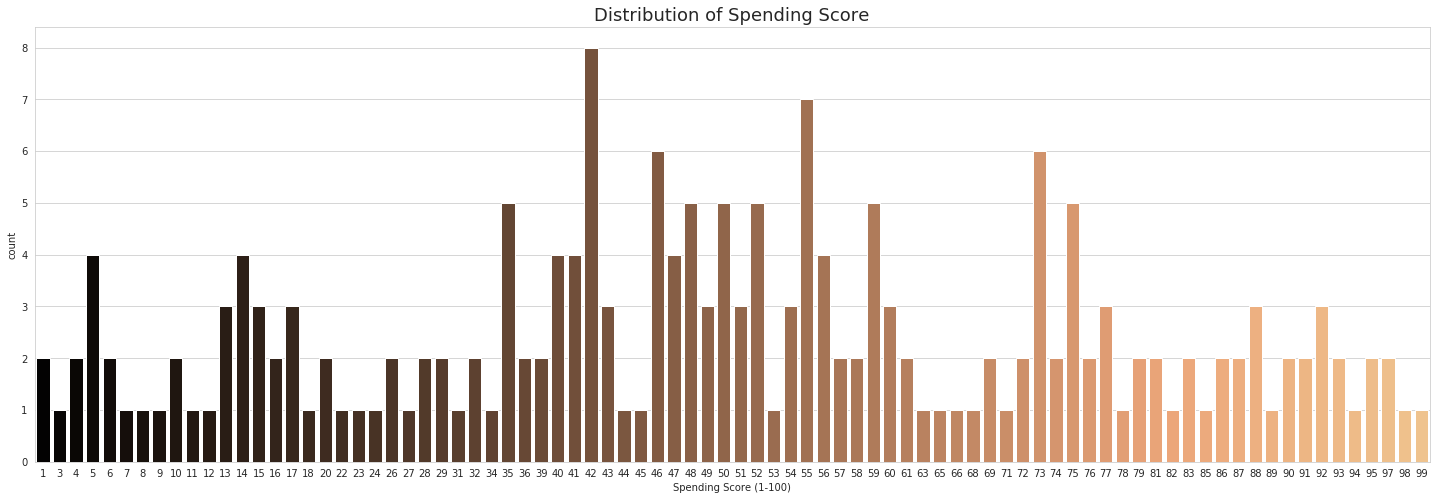

In [72]:
plt.figure(figsize=(25,8))
sns.countplot(df['Spending Score (1-100)'], palette='copper')
plt.title('Distribution of Spending Score', fontsize = 18)

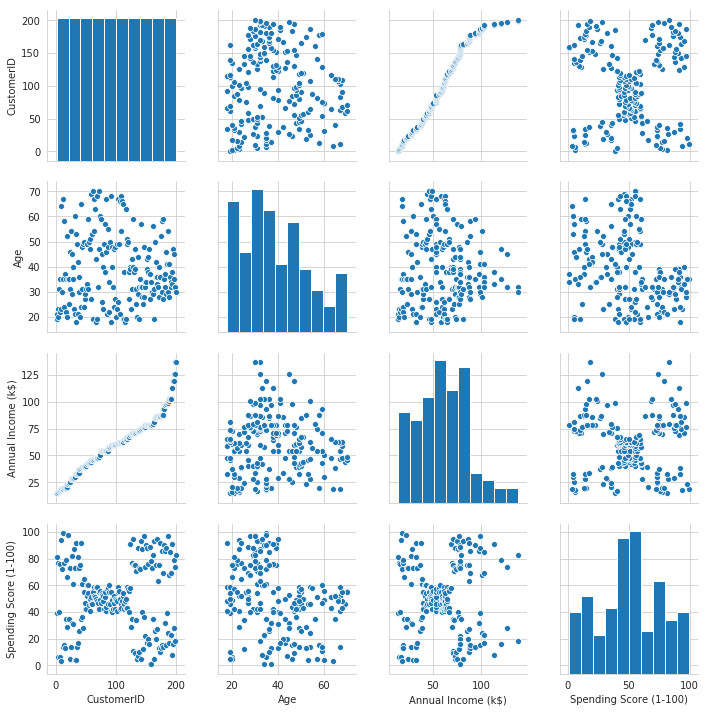

In [73]:
sns.pairplot(df)


Text(0.5, 1.0, 'Heatmap for the Data')

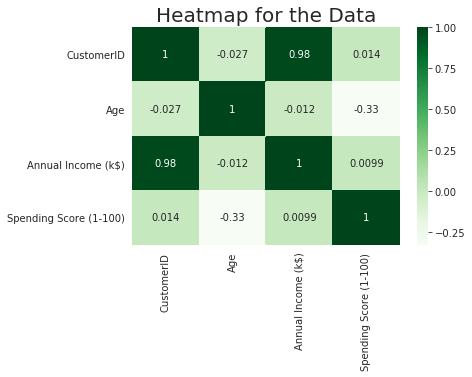

In [74]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.title('Heatmap for the Data', fontsize = 20)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Annual Income vs Age and Spending Score')

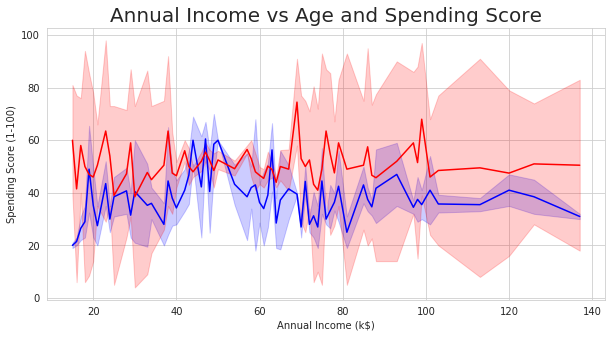

In [75]:
plt.figure(figsize=(10,5))
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue', markers=True)
sns.lineplot(x, z, color = 'red',  markers=True)
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)

Kmeans Algorithm

The Elbow Method to find the No. of Optimal Clusters

In [76]:
X = df.iloc[:, [3, 4]].values
X.shape

(200, 2)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


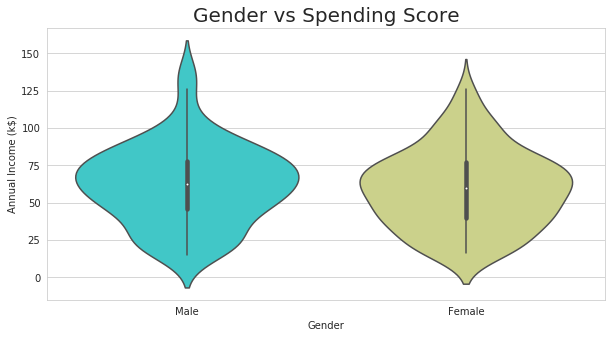

In [78]:
plt.figure(figsize=(10,5))
sns.violinplot(df['Gender'], df['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

Text(0, 0.5, 'wcss')

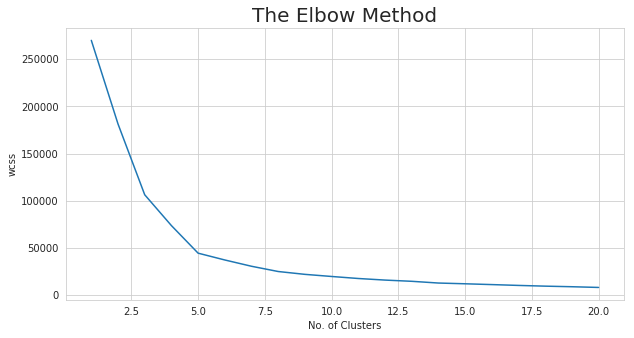

In [77]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,21):
    km = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
    km.fit(X)
    wcss.append(km.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')


In [116]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
y_means = km.fit_predict(X)

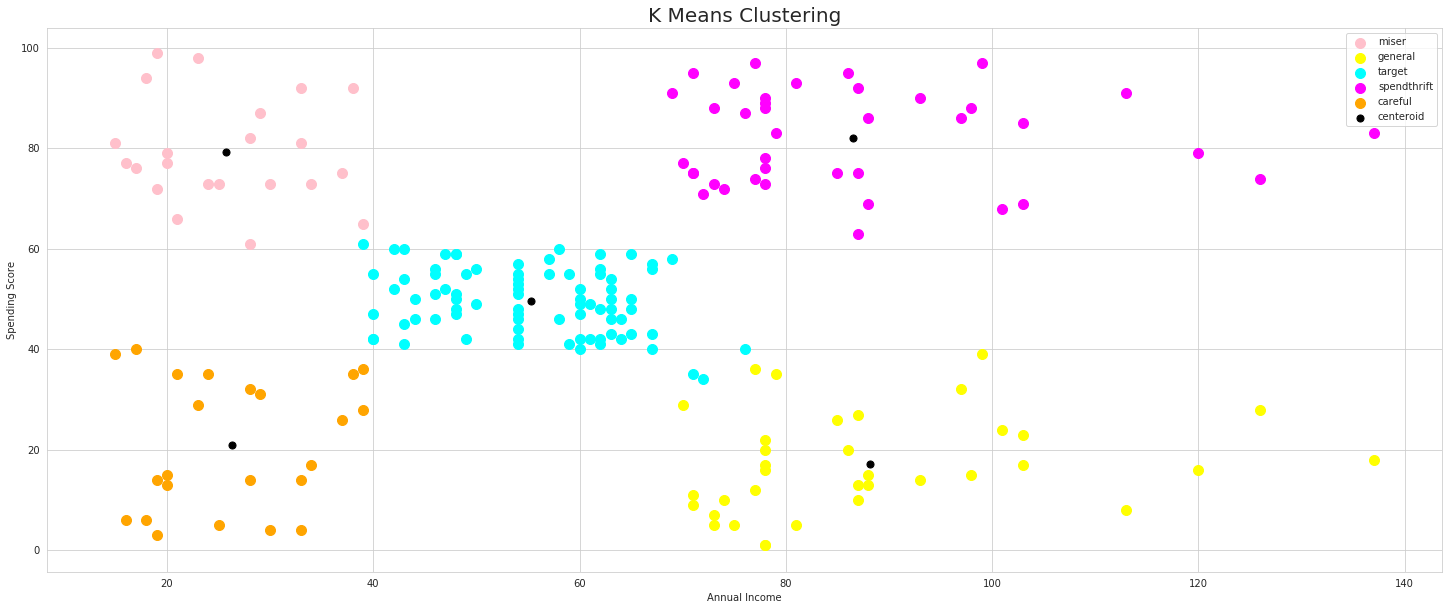

In [90]:
plt.figure(figsize=(25,10))

plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Clusters of Customers Based on their Ages



In [96]:
x = df.iloc[:, [2, 4]].values

In [97]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'wcss2')

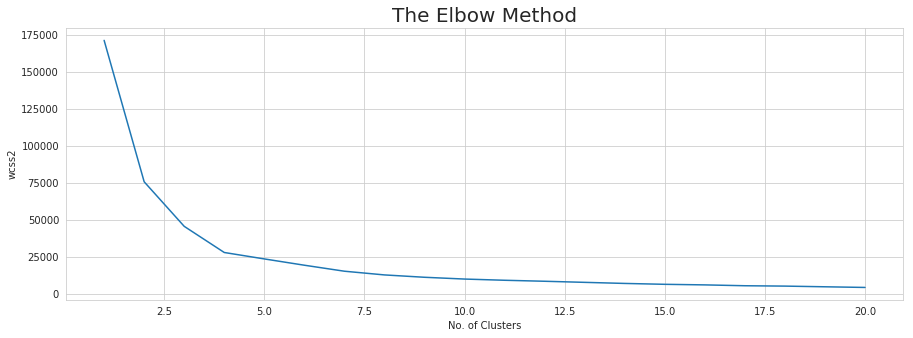

In [107]:
wcss2=[]

for i in range(1,21):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
    kmeans.fit(x)
    wcss2.append(kmeans.inertia_)
    
plt.figure(figsize=(15,5))
plt.plot(range(1,21), wcss2)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss2')

In [108]:
kms = KMeans(n_clusters=4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
ymeans = kms.fit_predict(x)

Cluster of Ages

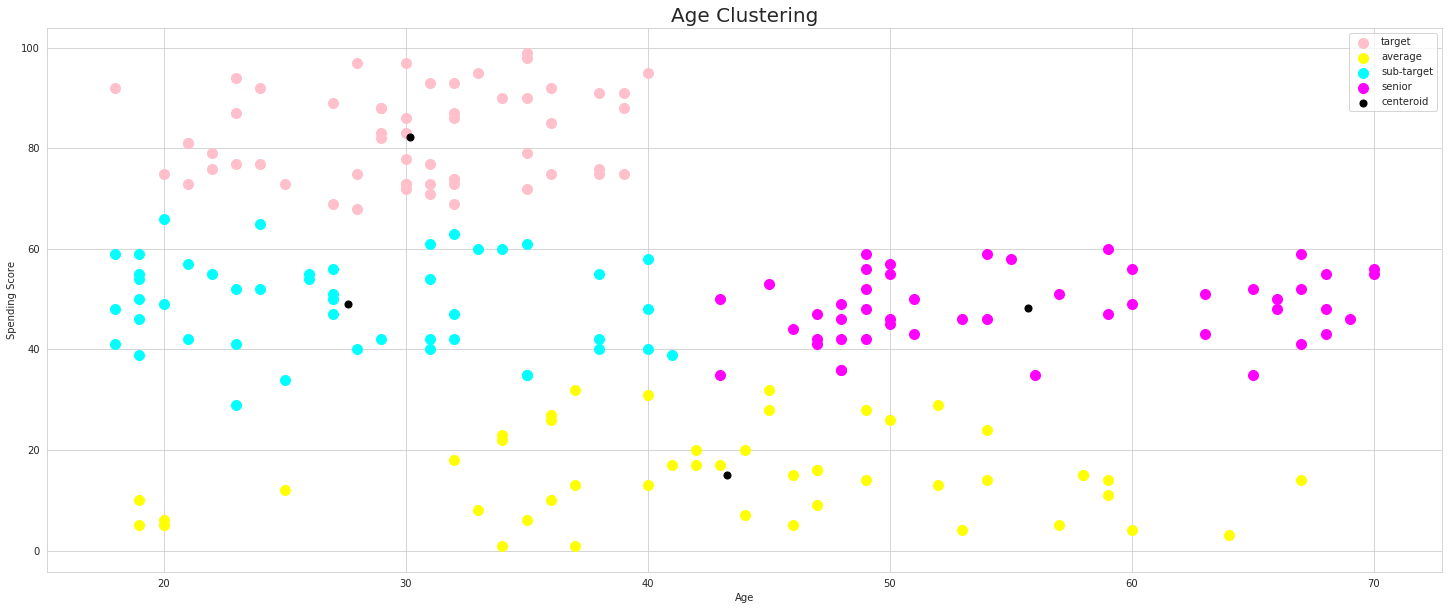

In [117]:
plt.figure(figsize=(25,10))

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'target')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'yellow', label = 'average')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'cyan', label = 'sub-target')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'magenta', label = 'senior')

plt.scatter(kms.cluster_centers_[:,0], kms.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')

plt.title('Age Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()